In [2]:
import matplotlib.pyplot as plt
import optimization as opt
import oracles
import plot_trajectory_2d
import numpy as np
import scipy
from tqdm import tqdm_notebook as tqdm
from collections import defaultdict
%matplotlib inline

$$ f(x) = \frac{1}{m}\sum_{i=0}^{m}\ln\left(1 + exp\left(-b_i(A_i, x)\right)\right) + \frac{r}{2}\|x\|^2$$

$$ df(x) = \frac{1}{m}\sum_{i=0}^{m}\frac{-b_i(A_i, dx)\ exp\left(-b_i(A_i, x)\right)}{1 + exp\left(-b_i(A_i, x)\right)} + r(x, dx)$$

$$ \nabla f(x) = \frac{1}{m}\sum_{i=0}^{m}\frac{-b_iA_i}{1 + exp\left(b_i(A_i, x)\right)} + rx$$

$$ d\nabla f(x) = \frac{1}{m}\sum_{i=0}^{m}\frac{b_i^2 A_i\ exp\left(b_i(A_i, x)\right)(A_i, dx)}{(1 + exp\left(b_i(A_i, x))\right)^2} + r dx$$

$$ \nabla^2 f(x) = \frac{1}{m}\sum_{i=0}^{m}\frac{b_i^2 A_iA_i^T\ exp\left(b_i(A_i, x)\right)}{(1 + exp\left(b_i(A_i, x))\right)^2} + rI_n$$


Перепишем выражения для функции, градиента и гессиана без суммирований

$$ f(x) = \frac{1}{m}\big(\mathbb{1}_m, \ln\left(1 + exp\left(-b \odot Ax)\right)\right)\big) + \frac{r}{2}\|x\|^2$$

$$ \nabla f(x) = \frac{A^T}{m}\left(b \odot \frac{-1}{1 + exp\left(b \odot Ax\right)}\right) + rx$$

$$ \nabla^2 f(x) = \frac{1}{m}A^T\ diag\left(\frac{b \odot b \odot exp\left(b \odot Ax\right)}{(1 + exp\left(b \odot Ax)\right)^2} \right) A\  + rI_n$$

/home/andrey/JupyterProjects/env/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


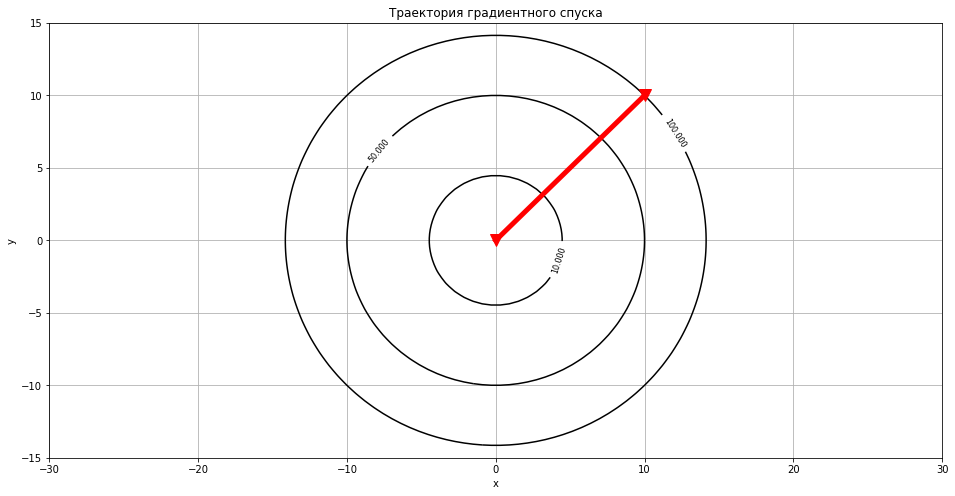

In [133]:
A = np.eye(2)
b = np.zeros([2])
x = np.array((10, 10))
o = oracles.QuadraticOracle(A, b)
_, _, h = opt.gradient_descent(o, x, trace=True)
plt.figure(figsize=(16, 8))
plot_trajectory_2d.plot_levels(lambda x: o.func(x), xrange=(-30, 30), yrange=(-15, 15), levels=(10, 50, 100))
plot_trajectory_2d.plot_trajectory(o, h['x'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Траектория градиентного спуска')
plt.savefig('exp1-1', bbox_inches='tight')

/home/andrey/JupyterProjects/env/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


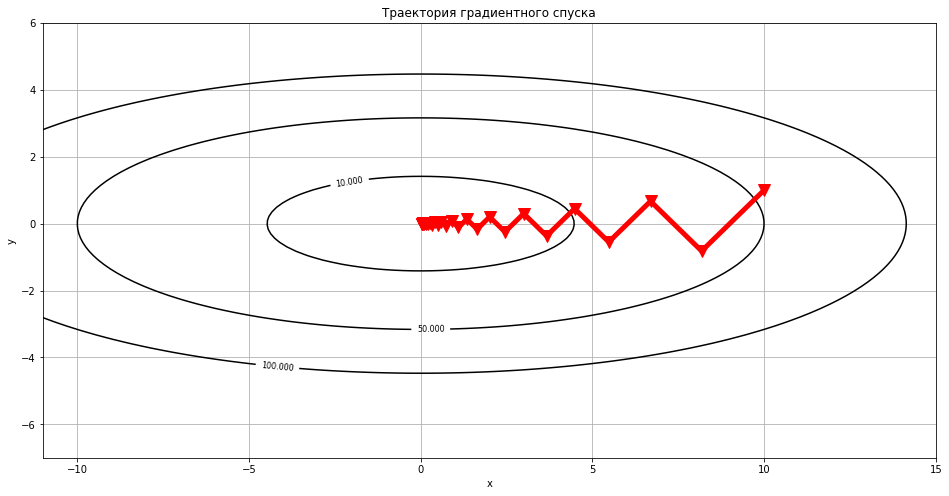

In [135]:
A = np.array([[1, 0], [0, 10]])
b = np.zeros([2])
x = np.array((10, 1))
plt.figure(figsize=(16, 8))
o = oracles.QuadraticOracle(A, b)
_, _, h = opt.gradient_descent(o, x, trace=True)
plot_trajectory_2d.plot_levels(lambda x: o.func(x), xrange=(-11, 15), yrange=(-7, 6), levels=(10, 50, 100))
plot_trajectory_2d.plot_trajectory(o, h['x'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Траектория градиентного спуска')
plt.savefig('exp1-2', bbox_inches='tight')

/home/andrey/JupyterProjects/env/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


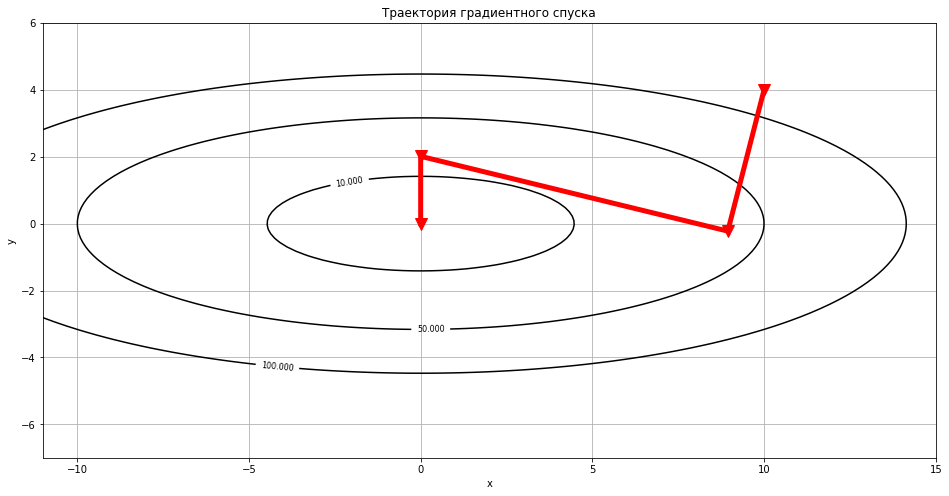

In [136]:
A = np.array([[1, 0], [0, 10]])
b = np.zeros([2])
x = np.array((10, 4))
plt.figure(figsize=(16, 8))
o = oracles.QuadraticOracle(A, b)
_, _, h = opt.gradient_descent(o, x, trace=True)
plot_trajectory_2d.plot_levels(lambda x: o.func(x), xrange=(-11, 15), yrange=(-7, 6), levels=(10, 50, 100))
plot_trajectory_2d.plot_trajectory(o, h['x'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Траектория градиентного спуска')
plt.savefig('exp1-3', bbox_inches='tight')

In [20]:
size = 100
xlist = np.linspace(-11, 15, size)
ylist = np.linspace(-7, 10, size)
X, Y = np.meshgrid(xlist, ylist)
Z = []
A = np.array([[1, 0], [0, 10]])
b = np.zeros([2])
o = oracles.QuadraticOracle(A, b)
for x in tqdm(xlist):
    for y in ylist:
        _, _, h = opt.gradient_descent(o, np.array([y, x]), trace=True)
        Z.append(len(h['x']))
Z = np.array(Z).reshape([size, size])

HBox(children=(IntProgress(value=0), HTML(value='')))

/home/andrey/JupyterProjects/env/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


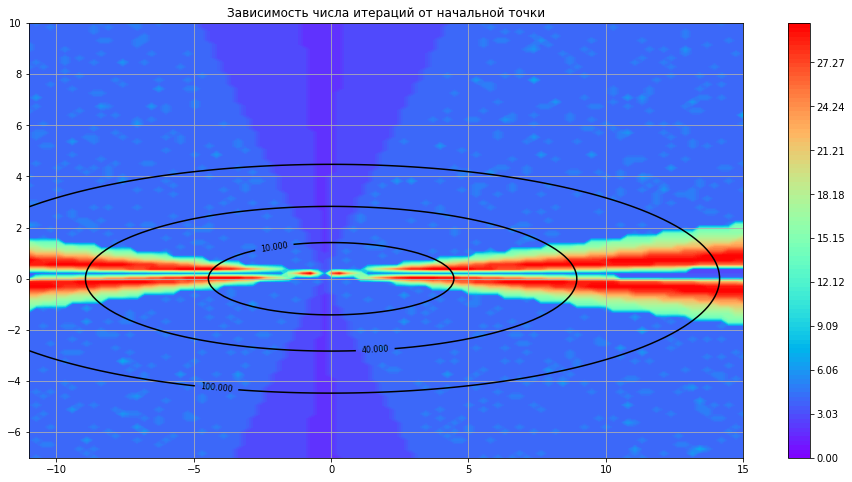

In [22]:
plt.figure(figsize=(16, 8))
cp = plt.contourf(X, Y, Z, levels = np.linspace(0, 30, 100), cmap='rainbow')
plt.colorbar(cp)
plot_trajectory_2d.plot_levels(lambda x: o.func(x), xrange=(-11, 15), yrange=(-7, 6), levels=(10, 40, 100))
plt.title('Зависимость числа итераций от начальной точки')
plt.savefig('exp1-4', bbox_inches='tight')

In [15]:
def random_oracle(n, k):
    a = np.random.randint(1, k+1, n)
    a[0] = 1
    a[-1] = k
    a = a / np.linalg.norm(a)
    b = np.random.randint(1, 100, n)
    x_0 = np.random.randint(1, 100, n)
    x_0 = x_0 / np.linalg.norm(x_0)
    return oracles.QuadraticOracle(scipy.sparse.diags(a), b), x_0

In [16]:
from collections import defaultdict
times_random = defaultdict(lambda : np.zeros([1000]))
for n in (2, 10, 100, 1000, 10000, 100000):
    for k in tqdm(range(2, 1000, 10)):
        o, x_0 = random_oracle(n, k)
        _, msg, h = opt.gradient_descent(o, x_0, trace=True)
        assert msg == 'success'
        times_random[n][k] = (len(h['func']))        

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

/home/andrey/JupyterProjects/env/lib/python3.5/site-packages/scipy/optimize/linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


HBox(children=(IntProgress(value=0), HTML(value='')))

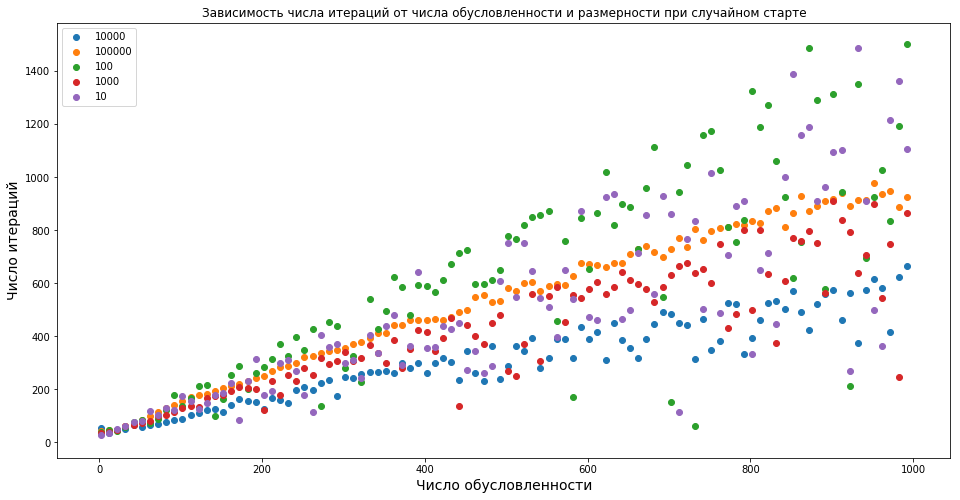

In [19]:
plt.figure(figsize=(16, 8))
for key in times_random:
    if key == 2:
        continue
    times_random[key][times_random[key] == 0] = None
    plt.scatter(range(0, times_random[key].size, 1), times_random[key], label=key)
plt.legend()
plt.xlabel('Число обусловленности', size=14)
plt.ylabel('Число итераций', size=14)
plt.title('Зависимость числа итераций от числа обусловленности и размерности при случайном старте')
plt.savefig('exp2-1', bbox_inches='tight')
plt.show()